In [3]:
import pandas as pd

In [1]:
#pip install git+https://github.com/quantopian/pyfolio
# import again if first time not work

import scipy
from scipy import sparse
import pyfolio

/usr/local/Cellar/jupyterlab/3.2.8/libexec/lib/python3.9/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [4]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline

In [5]:
def get_daily_return(df):
    df['daily_return']=df.account_value.pct_change(1)
    #df=df.dropna()
    print('Sharpe: ',(252**0.5)*df['daily_return'].mean()/ df['daily_return'].std())
    return df

In [24]:
def backtest_strat(df):
    strategy_ret= df.copy()
    strategy_ret['Date'] = pd.to_datetime(strategy_ret['Date'])
    strategy_ret.set_index('Date', drop = False, inplace = True)
    strategy_ret.index = strategy_ret.index.tz_localize('UTC')
    del strategy_ret['Date']
    ts = pd.Series(strategy_ret['daily_return'].values, index=strategy_ret.index)
    print(strategy_ret.index)
    return ts

In [88]:
def get_account_value(model_name):
    df_account_value=pd.DataFrame()
    for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
        temp = pd.read_csv('results/firstRun/account_value_trade_{}_{}.csv'.format(model_name,i))
        df_account_value = df_account_value.append(temp,ignore_index=True)
    df_account_value = pd.DataFrame({'account_value':df_account_value['0']})
    sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
    print(sharpe)
    df_account_value=df_account_value.join(df_trade_date[63:].reset_index(drop=True))
    return df_account_value

## DJIA

In [29]:
dji = pd.read_csv("data/^DJI.csv")
test_dji=dji[(dji['Date']>='2016-01-01') & (dji['Date']<='2020-06-30')]
test_dji = test_dji.reset_index(drop=True)

In [30]:
test_dji.shape

(1131, 7)

In [31]:
test_dji.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
1,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
3,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
4,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


In [32]:
test_dji['daily_return']=test_dji['Adj Close'].pct_change(1)

In [55]:
dow_strat = backtest_strat(test_dji)

DatetimeIndex(['2016-01-04 00:00:00+00:00', '2016-01-05 00:00:00+00:00',
               '2016-01-06 00:00:00+00:00', '2016-01-07 00:00:00+00:00',
               '2016-01-08 00:00:00+00:00', '2016-01-11 00:00:00+00:00',
               '2016-01-12 00:00:00+00:00', '2016-01-13 00:00:00+00:00',
               '2016-01-14 00:00:00+00:00', '2016-01-15 00:00:00+00:00',
               ...
               '2020-06-17 00:00:00+00:00', '2020-06-18 00:00:00+00:00',
               '2020-06-19 00:00:00+00:00', '2020-06-22 00:00:00+00:00',
               '2020-06-23 00:00:00+00:00', '2020-06-24 00:00:00+00:00',
               '2020-06-25 00:00:00+00:00', '2020-06-26 00:00:00+00:00',
               '2020-06-29 00:00:00+00:00', '2020-06-30 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=1131, freq=None)


## Ensemble Strategy

In [56]:
df=pd.read_csv('data/dow_30_2009_2020.csv')

In [57]:
rebalance_window = 63
validation_window = 63
unique_trade_date = df[(df.datadate > 20151001)&(df.datadate <= 20200707)].datadate.unique()


In [58]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

In [79]:
ensemble_account_value = get_account_value('ensemble')


/var/folders/tr/c2wvjjls6lj7203w704s6d8h0000gp/T/ipykernel_81084/2350381844.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_account_value = df_account_value.append(temp,ignore_index=True)
/var/folders/tr/c2wvjjls6lj7203w704s6d8h0000gp/T/ipykernel_81084/2350381844.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_account_value = df_account_value.append(temp,ignore_index=True)
/var/folders/tr/c2wvjjls6lj7203w704s6d8h0000gp/T/ipykernel_81084/2350381844.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_account_value = df_account_value.append(temp,ignore_index=True)
/var/folders/tr/c2wvjjls6lj7203w704s6d8h0000gp/T/ipykernel_81084/2350381844.py:5: FutureWarning: The frame.append method is deprecated and will be r

1.5627897458302762


/var/folders/tr/c2wvjjls6lj7203w704s6d8h0000gp/T/ipykernel_81084/2350381844.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_account_value = df_account_value.append(temp,ignore_index=True)
/var/folders/tr/c2wvjjls6lj7203w704s6d8h0000gp/T/ipykernel_81084/2350381844.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_account_value = df_account_value.append(temp,ignore_index=True)
/var/folders/tr/c2wvjjls6lj7203w704s6d8h0000gp/T/ipykernel_81084/2350381844.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_account_value = df_account_value.append(temp,ignore_index=True)


In [89]:
original_account_value = get_account_value('ensemble')

/var/folders/tr/c2wvjjls6lj7203w704s6d8h0000gp/T/ipykernel_81084/3867317203.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_account_value = df_account_value.append(temp,ignore_index=True)
/var/folders/tr/c2wvjjls6lj7203w704s6d8h0000gp/T/ipykernel_81084/3867317203.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_account_value = df_account_value.append(temp,ignore_index=True)
/var/folders/tr/c2wvjjls6lj7203w704s6d8h0000gp/T/ipykernel_81084/3867317203.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_account_value = df_account_value.append(temp,ignore_index=True)
/var/folders/tr/c2wvjjls6lj7203w704s6d8h0000gp/T/ipykernel_81084/3867317203.py:5: FutureWarning: The frame.append method is deprecated and will be r

1.516111866014984


/var/folders/tr/c2wvjjls6lj7203w704s6d8h0000gp/T/ipykernel_81084/3867317203.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_account_value = df_account_value.append(temp,ignore_index=True)


<AxesSubplot:>

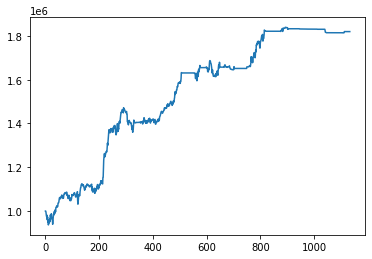

In [81]:
ensemble_account_value.account_value.plot()

In [90]:
original_account_value = get_daily_return(original_account_value)

Sharpe:  1.516111866014984


In [82]:
ensemble_account_value = get_daily_return(ensemble_account_value)

Sharpe:  1.5627897458302762


In [83]:
ensemble_account_value['Date'] = test_dji['Date']

In [91]:
original_account_value['Date'] = test_dji['Date']

In [84]:
ensemble_account_value.head()

,account_value,datadate,daily_return,Date
0,1.000000e+06,20160104,NaN,2016-01-04
1,1.000060e+06,20160105,0.000060,2016-01-05
2,9.949537e+05,20160106,-0.005106,2016-01-06
3,9.830988e+05,20160107,-0.011915,2016-01-07
4,9.758729e+05,20160108,-0.007350,2016-01-08


In [85]:
ensemble_strat = backtest_strat(ensemble_account_value[0:1097])

DatetimeIndex(['2016-01-04 00:00:00+00:00', '2016-01-05 00:00:00+00:00',
               '2016-01-06 00:00:00+00:00', '2016-01-07 00:00:00+00:00',
               '2016-01-08 00:00:00+00:00', '2016-01-11 00:00:00+00:00',
               '2016-01-12 00:00:00+00:00', '2016-01-13 00:00:00+00:00',
               '2016-01-14 00:00:00+00:00', '2016-01-15 00:00:00+00:00',
               ...
               '2020-04-29 00:00:00+00:00', '2020-04-30 00:00:00+00:00',
               '2020-05-01 00:00:00+00:00', '2020-05-04 00:00:00+00:00',
               '2020-05-05 00:00:00+00:00', '2020-05-06 00:00:00+00:00',
               '2020-05-07 00:00:00+00:00', '2020-05-08 00:00:00+00:00',
               '2020-05-11 00:00:00+00:00', '2020-05-12 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=1097, freq=None)


In [92]:
original_strat = backtest_strat(original_account_value[0:1097])

DatetimeIndex(['2016-01-04 00:00:00+00:00', '2016-01-05 00:00:00+00:00',
               '2016-01-06 00:00:00+00:00', '2016-01-07 00:00:00+00:00',
               '2016-01-08 00:00:00+00:00', '2016-01-11 00:00:00+00:00',
               '2016-01-12 00:00:00+00:00', '2016-01-13 00:00:00+00:00',
               '2016-01-14 00:00:00+00:00', '2016-01-15 00:00:00+00:00',
               ...
               '2020-04-29 00:00:00+00:00', '2020-04-30 00:00:00+00:00',
               '2020-05-01 00:00:00+00:00', '2020-05-04 00:00:00+00:00',
               '2020-05-05 00:00:00+00:00', '2020-05-06 00:00:00+00:00',
               '2020-05-07 00:00:00+00:00', '2020-05-08 00:00:00+00:00',
               '2020-05-11 00:00:00+00:00', '2020-05-12 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=1097, freq=None)


In [86]:
#ensemble_account_value.to_csv('results/df_account_value_ensemble_daily_return.csv',index=False)

/usr/local/Cellar/jupyterlab/3.2.8/libexec/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2016-01-04
End date,2020-05-12
Total months,52
,Backtest
Annual return,14.665%
Cumulative returns,81.432%
Annual volatility,8.912%
Sharpe ratio,1.58
Calmar ratio,1.92
Stability,0.88
Max drawdown,-7.62%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,7.62,2017-03-01,2017-04-19,2017-10-16,164
1,6.34,2016-01-05,2016-01-20,2016-02-25,38
2,5.25,2016-06-23,2016-06-27,2016-07-08,12
3,4.37,2018-06-08,2018-07-11,2019-01-18,161
4,3.80,2016-07-18,2016-09-26,2016-10-24,71


/usr/local/Cellar/jupyterlab/3.2.8/libexec/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/usr/local/Cellar/jupyterlab/3.2.8/libexec/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/usr/local/Cellar/jupyterlab/3.2.8/libexec/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/usr/local/Cellar/jupyterlab/3.2.8/libexec/lib/python3.9/site-packages/pyfolio/timeseries.py:541: FutureWarning: The default dt

Stress Events,mean,min,max
New Normal,0.06%,-3.81%,3.54%


/usr/local/Cellar/jupyterlab/3.2.8/libexec/lib/python3.9/site-packages/pyfolio/timeseries.py:1230: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  period = returns_dupe.loc[start:end]


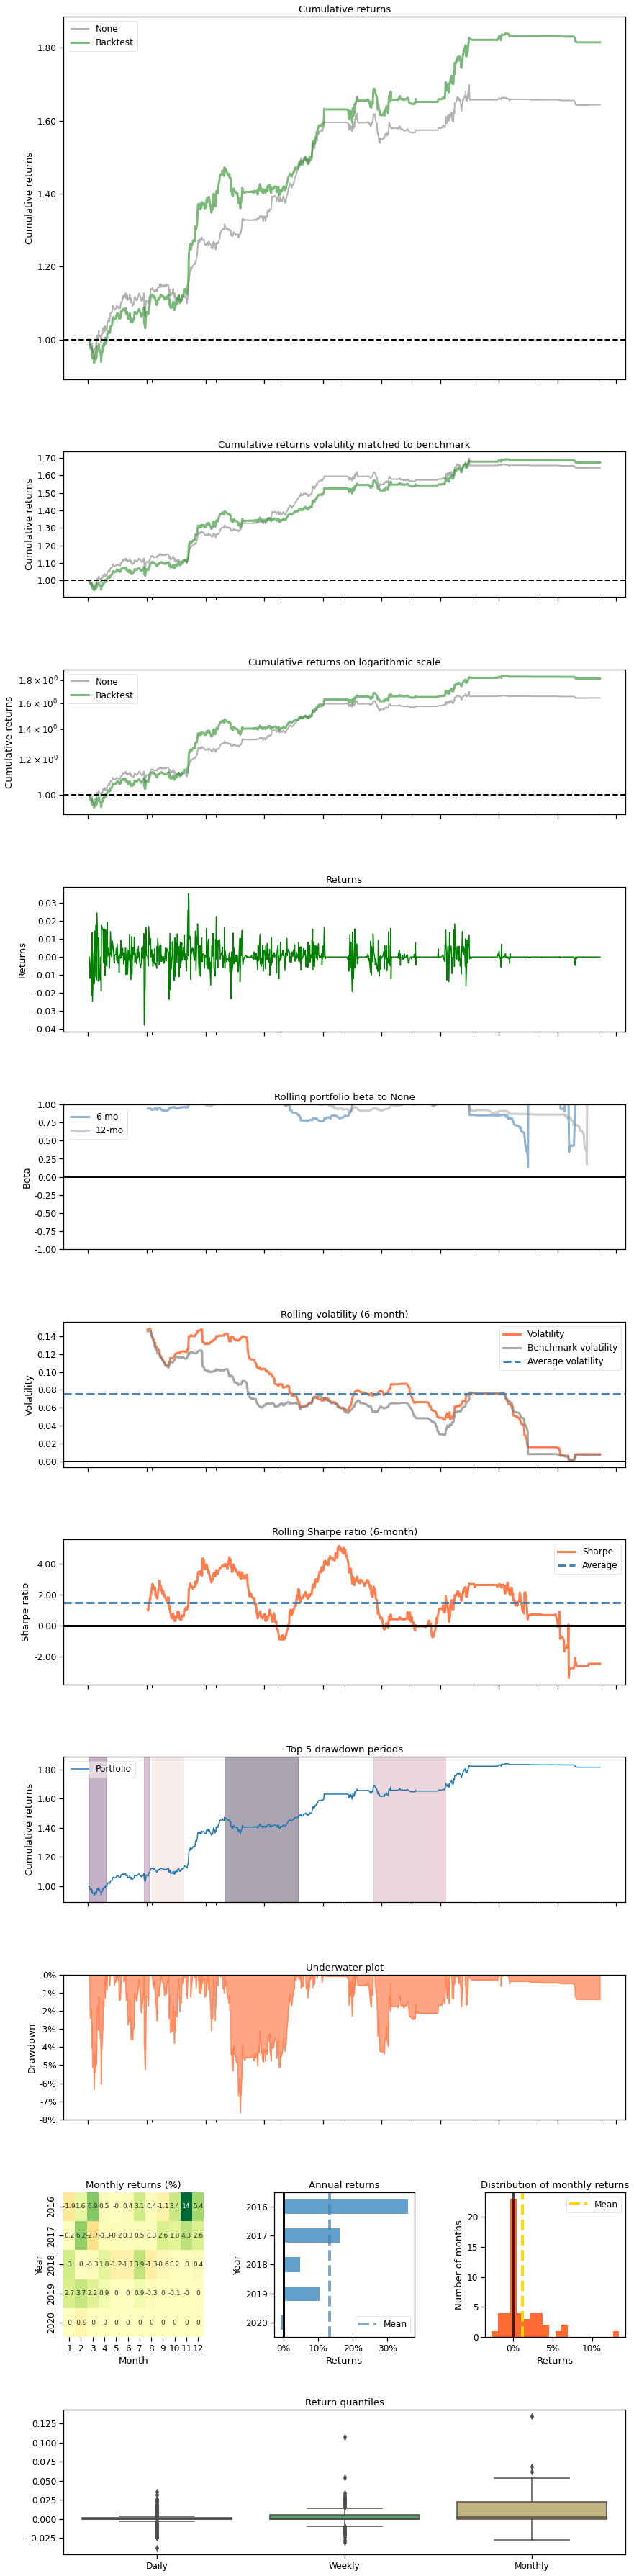

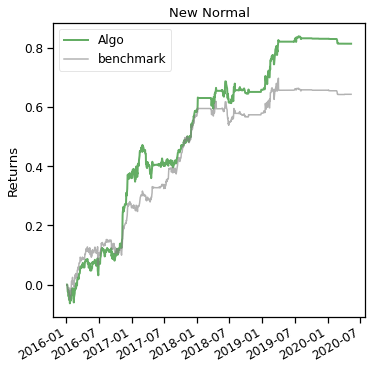

In [93]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = ensemble_strat,
                                   benchmark_rets=original_strat, set_context=False)